Steady state heat equation
======

This notebook will setup and solve the steady state heat equation:

\\[
\nabla(k\nabla)T = h
\\]

where $k$ is the diffusivity, T the temperature field and $h$ the source term.

**Keywords:** initial conditions, boundary conditions, heat equation

In [1]:
import UWGeodynamics as GEO
import glucifer

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


Setup parameters
-----

In [2]:
u = GEO.UnitRegistry

In [3]:
model_length = 20. * u.centimeter
model_height = 10. * u.centimeter
top_Temp = 273.15 * u.degK
base_Temp = 1603.15 * u.degK

KL = model_height
KT = (base_Temp - top_Temp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[temperature]"]= KT

Create mesh and variables
------

In [4]:
Model = GEO.Model(elementRes=(16, 8), 
                  minCoord=(0. * u.centimeter, 0. * u.centimeter), 
                  maxCoord=(20. * u.centimeter, 10. * u.centimeter))

In [5]:
Model.set_temperatureBCs(top=273.15 * u.degK, bottom=1603.15 * u.degK)


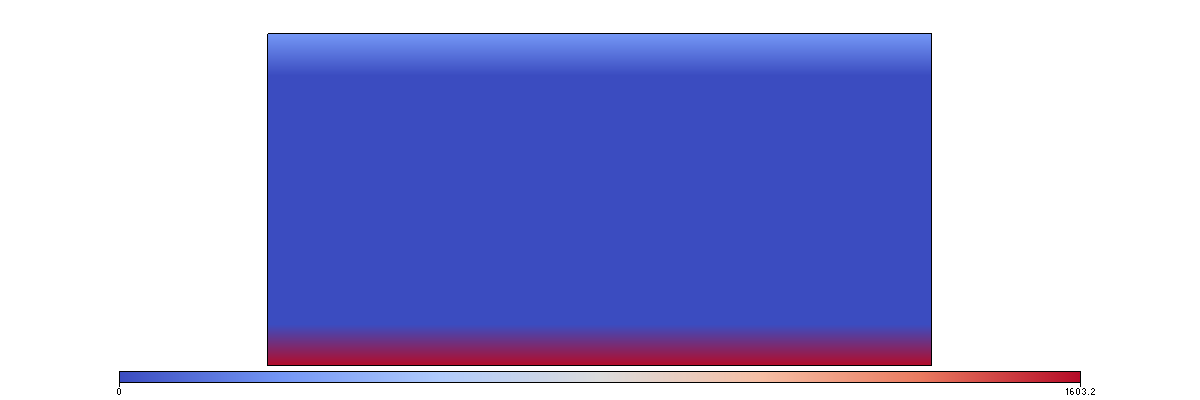

In [6]:
Fig = glucifer.Figure(figsize=(1200, 400))
Fig.Surface(Model.mesh, GEO.Dimensionalize(Model.temperature, u.degK), colours="coolwarm")
Fig.save("Figure_1.png")
Fig.show()

Heat Equation System setup & solve
-----

Temperature field, diffusivity and boundary conditions are passed to the SteadyStateHeat system function.

In [7]:
Model.diffusivity = 1.0 * u.centimetre**2 / u.hour

In [8]:
Model.solve_temperature_steady_state()


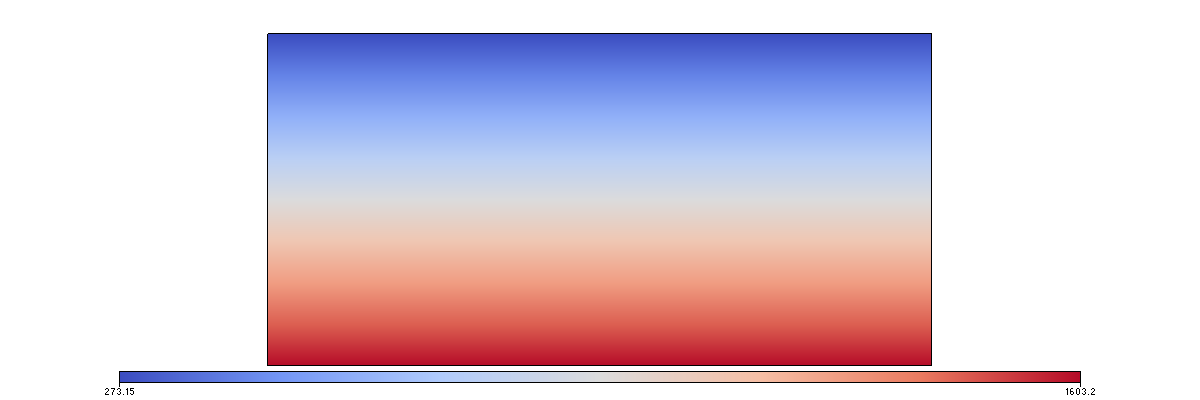

In [9]:
Fig = glucifer.Figure(figsize=(1200, 400))
Fig.Surface(Model.mesh, GEO.Dimensionalize(Model.temperature, u.degK), colours="coolwarm")
Fig.save("Figure_2.png")
Fig.show()